# 🏀 NBA Player Statistics Analysis and Score Prediction
In this project, we aim to predict the points an NBA player will score in the next game using historical data (Assists, Rebounds, Minutes Played, etc.).

**Data Set:** 2024-2025 Season Player
**Method:**  Regression Analysis & Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, kurtosis, skew
from scipy import stats as ss
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error
import warnings
import importlib 

In [2]:
try:
    df_raw = pd.read_csv('data/data.csv')
    print(f"Dataset loaded successfully. Total rows: {df_raw.shape[0]}.")
except FileNotFoundError:
    print("Error: 'data.csv' is not found.")

numeric_cols = ['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 
                'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc']
categorical_cols = ['Tm']

df_avg_numeric = df_raw.groupby('Player')[numeric_cols].mean()
df_avg_categorical = df_raw.groupby('Player')[categorical_cols].first()
df_avg = pd.concat([df_avg_categorical, df_avg_numeric], axis=1).reset_index()

df_avg['FG%'] = (df_avg['FG'] / df_avg['FGA']).fillna(0)
df_avg['3P%'] = (df_avg['3P'] / df_avg['3PA']).fillna(0)
df_avg['FT%'] = (df_avg['FT'] / df_avg['FTA']).fillna(0)

column_mapping = {
    'Player': 'Name', 'Tm': 'Team',
    '3P': 'ThreeP', '3PA': '3PA', '3P%': '3P%'
}
df = df_avg.rename(columns=column_mapping)

X = df[["MP", "FG", "FGA", "FG%", "ThreeP", "3PA", "3P%", 
        "FT", "FTA", "FT%", "ORB", "TRB", "DRB", 
        "AST", "STL", "BLK", "TOV", "PF"]]
y = df["PTS"]

df.head()

Dataset loaded successfully. Total rows: 16512.


,Name,Team,MP,FG,FGA,ThreeP,3PA,FT,FTA,ORB,...,AST,STL,BLK,TOV,PF,PTS,GmSc,FG%,3P%,FT%
0,A.J. Green,MIL,21.997500,2.590909,5.863636,2.181818,5.045455,0.295455,0.340909,0.250000,...,1.272727,0.545455,0.113636,0.613636,2.113636,7.659091,5.404545,0.441860,0.432432,0.866667
1,A.J. Lawson,TOR,3.757500,1.000000,2.000000,0.500000,1.250000,0.250000,0.750000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.750000,1.875000,0.500000,0.400000,0.333333
2,AJ Johnson,MIL,6.022222,1.000000,2.777778,0.333333,0.777778,0.111111,0.222222,0.000000,...,1.222222,0.111111,0.000000,0.444444,0.111111,2.444444,1.633333,0.360000,0.428571,0.500000
3,Aaron Gordon,DEN,26.666000,4.333333,8.500000,1.133333,2.800000,2.533333,3.233333,1.533333,...,3.066667,0.466667,0.266667,1.333333,1.600000,12.333333,10.696667,0.509804,0.404762,0.783505
4,Aaron Holiday,HOU,11.371944,1.444444,3.444444,0.861111,2.305556,0.472222,0.527778,0.166667,...,1.194444,0.361111,0.111111,0.472222,1.055556,4.222222,3.097222,0.419355,0.373494,0.894737


## Statistical Analysis and Normality Tests
The normality of the data distribution was analyzed using Shapiro-Wilk and D'Agostino tests.

Field Goals (FG) Skewness: 0.98
Field Goals (FG) Kurtosis: 0.40
D'Agostino Test p-value: 0.00000000000000072877


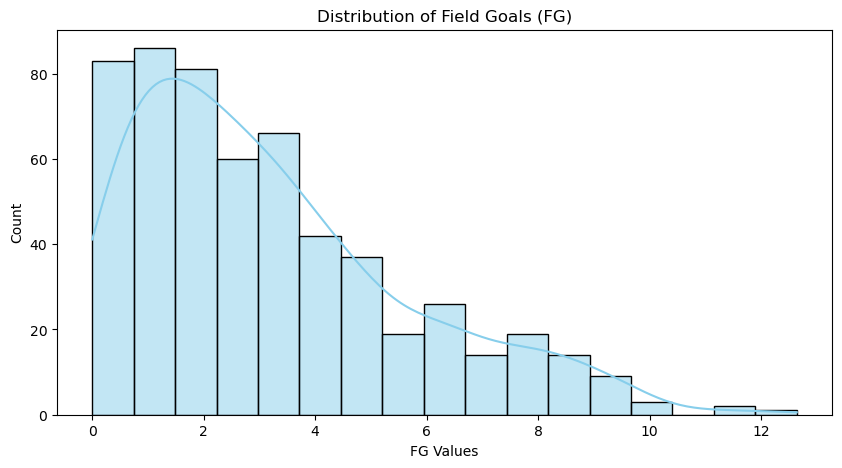

In [3]:
stat_dagostino, p_dagostino = normaltest(X['FG'])

print(f"Field Goals (FG) Skewness: {skew(X['FG']):.2f}")
print(f"Field Goals (FG) Kurtosis: {kurtosis(X['FG']):.2f}")
print(f"D'Agostino Test p-value: {p_dagostino:.20f}")

plt.figure(figsize=(10, 5))
sns.histplot(X['FG'], kde=True, color='skyblue')
plt.title("Distribution of Field Goals (FG)")
plt.xlabel("FG Values")
plt.show()

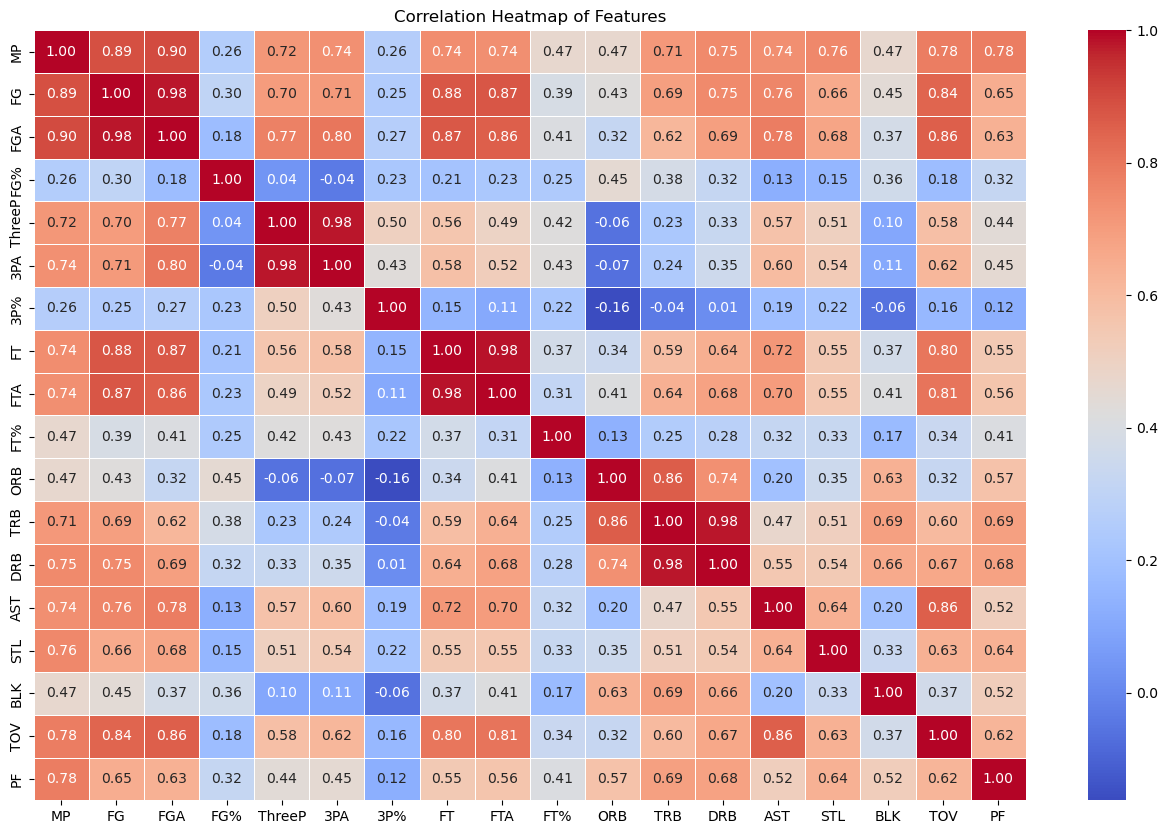

In [4]:
plt.figure(figsize=(16, 10))
sns.heatmap(X.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Machine Learning Model (Linear Regression)
The dataset was split into 80% training and 20% testing sets, and the model was trained.

Model R² Score: 1.0000
Root Mean Squared Error (RMSE): 0.00000000000001400635


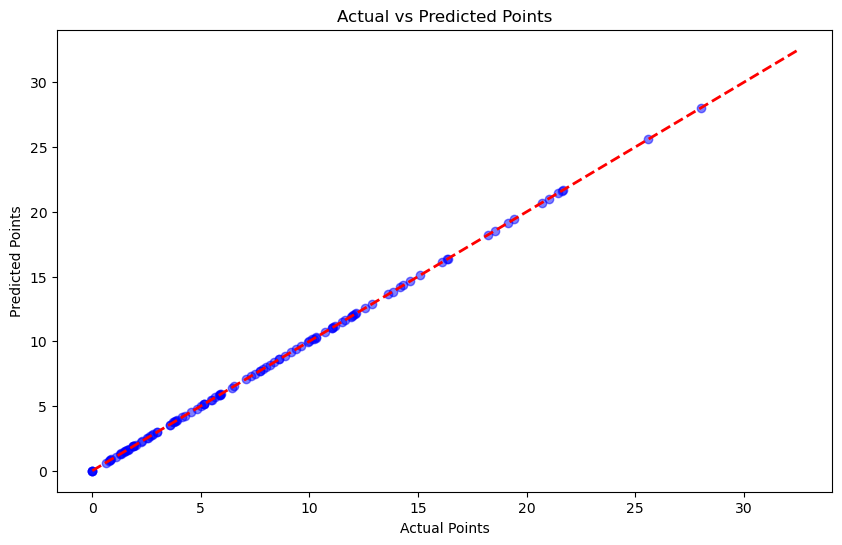

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.20f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Points")      
plt.ylabel("Predicted Points")           
plt.title('Actual vs Predicted Points')
plt.show()

In [6]:

X_opt_df = df[['FG', 'ThreeP', 'FT']]
X_opt_with_const = sm.add_constant(X_opt_df)
regressor_OLS = sm.OLS(endog=y, exog=X_opt_with_const).fit()

print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.299e+32
Date:                Wed, 24 Dec 2025   Prob (F-statistic):               0.00
Time:                        21:59:44   Log-Likelihood:                 17694.
No. Observations:                 562   AIC:                        -3.538e+04
Df Residuals:                     558   BIC:                        -3.536e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.442e-15   3.66e-16     -9.402      0.0

In [7]:

example_data = [1.0, 6.0, 1.0, 3.0] 
prediction = regressor_OLS.predict(example_data)
print(f"Predicted Points: {prediction[0]:.2f}")

print("\n--- Players with Similar Performance ---")
similar_players = df[abs(df["PTS"] - prediction[0]) <= 0.5]
similar_players[['Name', 'Team', 'PTS']].head() 

Predicted Points: 16.00

--- Players with Similar Performance ---


,Name,Team,PTS
39,Bam Adebayo,MIA,16.408163
43,Bennedict Mathurin,IND,16.354167
142,Derrick White,BOS,16.102041
146,Devin Vassell,SAS,16.147059
185,Gradey Dick,TOR,15.622222


In [8]:

similarity_threshold = 0.5

similar_players = df[abs(df["PTS"] - prediction[0]) <= similarity_threshold]

print(f"\n--- Real Players Within ±{similarity_threshold} Points of Prediction ---")

if similar_players.empty:
    print("No players found close to the prediction.")
else:
    display_table = similar_players[['Name', 'Team', 'PTS', 'FG', 'ThreeP', 'FT']].head(5)
    
    from IPython.display import display
    display(display_table)


--- Real Players Within ±0.5 Points of Prediction ---


,Name,Team,PTS,FG,ThreeP,FT
39,Bam Adebayo,MIA,16.408163,6.387755,0.734694,2.897959
43,Bennedict Mathurin,IND,16.354167,5.791667,1.479167,3.291667
142,Derrick White,BOS,16.102041,5.530612,3.346939,1.693878
146,Devin Vassell,SAS,16.147059,6.117647,2.323529,1.588235
185,Gradey Dick,TOR,15.622222,5.333333,2.200000,2.755556


In [9]:
print("\n--- TOP 12 PLAYERS OF THE 2024-2025 SEASON ---")

df_top_players = df.sort_values(by='GmSc', ascending=False)

top_12_team = df_top_players[['Name', 'Team', 'GmSc', 'PTS', 'AST', 'TRB']].head(12)

try:
    top_12_team.to_csv('data/top_12_player.csv', index=False, encoding='utf-8-sig')
    print("✅ 'data/top_12_player.csv' file saved successfully.")
except Exception as e:
    print(e)

top_12_team


--- TOP 12 PLAYERS OF THE 2024-2025 SEASON ---
✅ 'data/top_12_player.csv' file saved successfully.


,Name,Team,GmSc,PTS,AST,TRB
414,Nikola Jokić,DEN,30.567391,29.695652,10.326087,12.695652
480,Shai Gilgeous-Alexander,OKC,26.742000,32.440000,5.900000,5.220000
183,Giannis Antetokounmpo,MIL,26.376190,31.619048,5.976190,12.333333
30,Anthony Davis,LAL,23.104762,25.738095,3.357143,11.857143
364,Luka Dončić,DAL,22.700000,28.136364,7.818182,8.318182
522,Trey Murphy III,NOP,21.543750,25.625000,4.187500,5.625000
313,Karl-Anthony Towns,NYK,21.232609,24.326087,3.326087,13.608696
356,LeBron James,LAL,20.943478,24.456522,9.043478,7.782609
149,Domantas Sabonis,SAC,20.695833,20.395833,6.333333,14.270833
539,Victor Wembanyama,SAS,20.672093,24.418605,3.627907,10.906977
